In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import mnist

sns.set_theme(style='darkgrid')

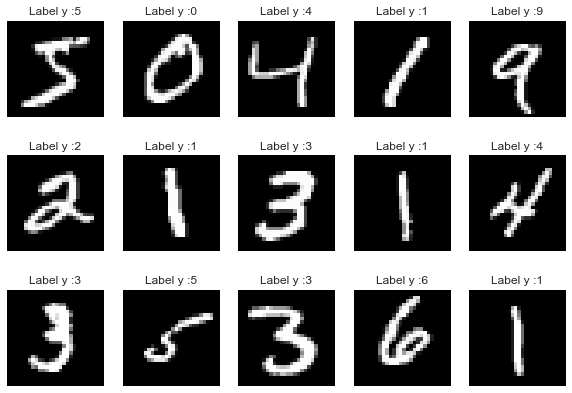

In [9]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
fig = plt.figure(figsize=(10,7))
for i in range(15):
    ax = fig.add_subplot(3,5,i+1)
    ax.imshow(X_train[i],cmap = 'gray')
    ax.set_title(f'Label y :{y_train[i]}')
    plt.axis('off')
              

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train = X_train.reshape(-1,28*28)/255
X_test = X_test.reshape(-1,28*28)/255

In [21]:
class SoftMaxRegression:
    def __init__(self):
        self.w = None
        self.b = None
        self._y = None
        
    def __linear_combination(self,X):
        return X@self.w + self.b
    
    def __softmax(self,z):
        z -= z.max(axis = 1,keepdims = True)
        prob = np.exp(z)/np.exp(z).sum(axis = 1,keepdims=True)
        
        return prob

    def one_hot_encode(self,y):
        return np.eye(len(np.unique(y)))[y]
    
    def __activation_function(self,X):
        return self.__softmax(self.__linear_combination(X))
    
    def __loss(self,X,y):
        y_pred = self.__activation_function(X)
        
        return -np.sum(y*(np.log(y_pred)))
    
    def fit(self,X,y,lr=0.001,epochs=1000):
        self.w = np.zeros(X.shape[-1])
        self.b = 0
        self._y = self.one_hot_encode(y)
        
        self.losses = []
        
        for _ in range(epochs):
            self.losses.append(self.__loss(X,self._y))
            y_hat = self.__activation_function(X)
            
            d_w = (1/X.shape[0])*(np.transpose(X)@(y_hat - self._y))
            self.w -= lr*d_w
            
            d_b = np.sum(y_hat - y_hot)
            self.b -= lr*d_b
            
        print(f'Final loss={self.losses[-1]}')
        return self.losses

        
        



In [22]:
smr = SoftMaxRegression()

In [23]:
smr.fit(X_train,y_train)

AxisError: axis 1 is out of bounds for array of dimension 1

In [27]:
w = np.random.randn(X_train.shape[-1])
b = np.random.randint(1000)

In [33]:
z = (X_train@w + b)

In [32]:
y_train.shape

(60000,)

In [35]:
z -= np.max(z)
np.exp(z)/np.exp

array([-17.83151046, -27.16009776, -31.52458862, ..., -19.62748854,
       -32.6160146 , -27.56057666])